<a href="https://colab.research.google.com/github/Eazlizy/healthcare_company/blob/main/T_Shirt_Size.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
data = np.array([
    [158, 58, 'M'],
    [158, 59, 'M'],
    [158, 63, 'M'],
    [160, 59, 'M'],
    [160, 60, 'M'],
    [163, 60, 'M'],
    [163, 61, 'M'],
    [160, 64, 'L'],
    [163, 64, 'L'],
    [165, 61, 'L'],
    [165, 62, 'L'],
    [165, 65, 'L'],
    [168, 62, 'L'],
    [168, 63, 'L'],
    [168, 66, 'L'],
    [170, 63, 'L'],
    [170, 64, 'L'],
    [170, 68, 'L']
])
size_mapping = {'M': 0, 'L': 1}
data_numeric = np.copy(data)
data_numeric[:, 2] = [size_mapping[size] for size in data_numeric[:, 2]]
data_numeric = data_numeric.astype(int)
liya = np.array([161, 61])
distances = np.linalg.norm(data_numeric[:, :2] - liya, axis=1)
indices_of_closest = np.argsort(distances)[:5]
print("Five customers closest to Liya:")
for index in indices_of_closest:
    customer = data[index]
    print(f"Height: {customer[0]}cm, Weight: {customer[1]}kg, T-shirt size: {customer[2]}")



Five customers closest to Liya:
Height: 160cm, Weight: 60kg, T-shirt size: M
Height: 163cm, Weight: 61kg, T-shirt size: M
Height: 160cm, Weight: 59kg, T-shirt size: M
Height: 163cm, Weight: 60kg, T-shirt size: M
Height: 160cm, Weight: 64kg, T-shirt size: L


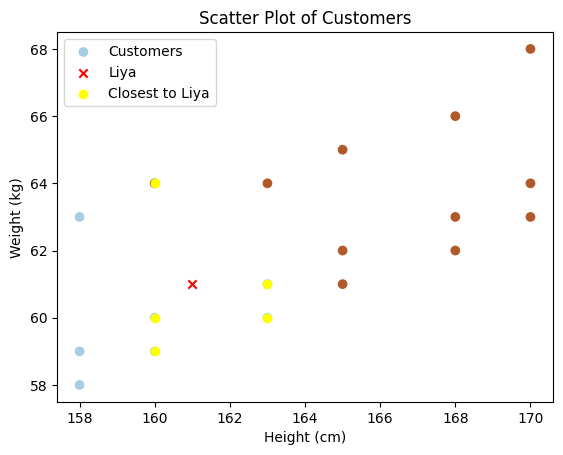

In [3]:
import numpy as np
import matplotlib.pyplot as plt

data = np.array([
    [158, 58, 'M'],
    [158, 59, 'M'],
    [158, 63, 'M'],
    [160, 59, 'M'],
    [160, 60, 'M'],
    [163, 60, 'M'],
    [163, 61, 'M'],
    [160, 64, 'L'],
    [163, 64, 'L'],
    [165, 61, 'L'],
    [165, 62, 'L'],
    [165, 65, 'L'],
    [168, 62, 'L'],
    [168, 63, 'L'],
    [168, 66, 'L'],
    [170, 63, 'L'],
    [170, 64, 'L'],
    [170, 68, 'L']
])

size_mapping = {'M': 0, 'L': 1}
data_numeric = np.copy(data)
data_numeric[:, 2] = [size_mapping[size] for size in data_numeric[:, 2]]
data_numeric = data_numeric.astype(int)

liya = np.array([161, 61])

distances = np.linalg.norm(data_numeric[:, :2] - liya, axis=1)

indices_of_closest = np.argsort(distances)[:5]

plt.scatter(data_numeric[:, 0], data_numeric[:, 1], c=data_numeric[:, 2], cmap=plt.cm.Paired, label='Customers')
plt.scatter(liya[0], liya[1], c='red', marker='x', label='Liya')  # Liya in red
plt.scatter(data_numeric[indices_of_closest, 0], data_numeric[indices_of_closest, 1], c='yellow', marker='o', label='Closest to Liya')
plt.xlabel('Height (cm)')
plt.ylabel('Weight (kg)')
plt.title('Scatter Plot of Customers')
plt.legend()
plt.show()


In [28]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.metrics.pairwise import euclidean_distances

data = {
    'height': [158, 158, 158, 160, 160, 163, 163, 160, 163, 165, 165, 165, 168, 168, 168, 170, 170, 170],
    'weight': [58, 59, 63, 59, 60, 60, 61, 64, 64, 61, 62, 65, 62, 63, 66, 63, 64, 68],
    't-shirt size': ['M', 'M', 'M', 'M', 'M', 'M', 'M', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L']
}

df = pd.DataFrame(data)

scaler = StandardScaler()
df[['height', 'weight']] = scaler.fit_transform(df[['height', 'weight']])

liya = {'height': 161, 'weight': 61}
liya_standardized = scaler.transform([list(liya.values())])

df['distance_standardized'] = euclidean_distances(df[['height', 'weight']], liya_standardized).flatten()
closest_customers_standardized = df.nsmallest(5, 'distance_standardized')

closest_customers_sorted = closest_customers_standardized.sort_values('distance_standardized')
print("Five closest neighbors to Liya (sorted in ascending order):")
print(closest_customers_sorted[['height', 'weight', 't-shirt size']])


Five closest neighbors to Liya (sorted in ascending order):
     height    weight t-shirt size
4 -0.951662 -0.911322            M
6 -0.237915 -0.520756            M
5 -0.237915 -0.911322            M
3 -0.951662 -1.301889            M
9  0.237915 -0.520756            L


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


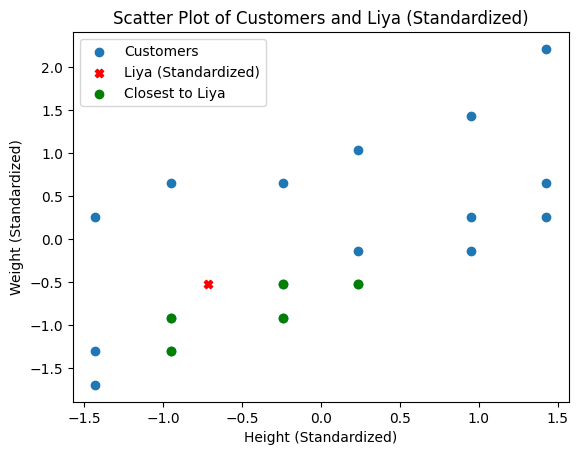

In [29]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.metrics.pairwise import euclidean_distances
import matplotlib.pyplot as plt

data = {
    'height': [158, 158, 158, 160, 160, 163, 163, 160, 163, 165, 165, 165, 168, 168, 168, 170, 170, 170],
    'weight': [58, 59, 63, 59, 60, 60, 61, 64, 64, 61, 62, 65, 62, 63, 66, 63, 64, 68],
    't-shirt size': ['M', 'M', 'M', 'M', 'M', 'M', 'M', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L']
}

df = pd.DataFrame(data)

scaler = StandardScaler()
df[['height', 'weight']] = scaler.fit_transform(df[['height', 'weight']])

liya = {'height': 161, 'weight': 61}
liya_standardized = scaler.transform([list(liya.values())])

df['distance_standardized'] = euclidean_distances(df[['height', 'weight']], liya_standardized).flatten()
closest_customers_standardized = df.nsmallest(5, 'distance_standardized')

plt.scatter(df['height'], df['weight'], label='Customers')
plt.scatter(liya_standardized[0][0], liya_standardized[0][1], color='red', marker='X', label='Liya (Standardized)')

plt.scatter(closest_customers_standardized['height'], closest_customers_standardized['weight'], color='green', marker='o', label='Closest to Liya')

plt.xlabel('Height (Standardized)')
plt.ylabel('Weight (Standardized)')
plt.title('Scatter Plot of Customers and Liya (Standardized)')
plt.legend()
plt.show()
